In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


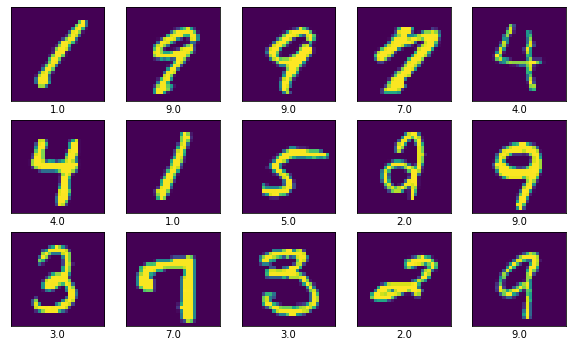

In [4]:
import matplotlib.pyplot as plt

X = np.array(train_data.drop("label", axis=1)).astype("float32")
y = np.array(train_data["label"]).astype("float32")

plt.figure(figsize=(10,10))
position = 1
for index in [0, 11, 33, 666, 999, 1999, 2020, 7777, 10000, 11111, 20000, 22222, 30000, 33333, 41999]:
    plt.subplot(5, 5, position)
    position += 1
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[index].reshape(28,28))
    plt.xlabel(y[index])
plt.show()

In [5]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X = X / 255
X = X.reshape(-1, 28, 28, 1)
y = to_categorical(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_test = np.array(test_data).astype("float32")
X_test = X_test / 255
X_test = X_test.reshape(-1, 28, 28, 1)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding="Same", activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5,5), padding="Same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

Using TensorFlow backend.


In [7]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, batch_size=85, validation_data=(X_val, y_val))

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 186s 6ms/step - loss: 0.2568 - accuracy: 0.9166 - val_loss: 0.0602 - val_accuracy: 0.9800
Epoch 2/10
33600/33600 [==============================] - 181s 5ms/step - loss: 0.0677 - accuracy: 0.9798 - val_loss: 0.0594 - val_accuracy: 0.9827
Epoch 3/10
33600/33600 [==============================] - 182s 5ms/step - loss: 0.0485 - accuracy: 0.9849 - val_loss: 0.0412 - val_accuracy: 0.9887
Epoch 4/10
33600/33600 [==============================] - 186s 6ms/step - loss: 0.0405 - accuracy: 0.9883 - val_loss: 0.0339 - val_accuracy: 0.9902
Epoch 5/10
33600/33600 [==============================] - 182s 5ms/step - loss: 0.0348 - accuracy: 0.9895 - val_loss: 0.0430 - val_accuracy: 0.9860
Epoch 6/10
33600/33600 [==============================] - 183s 5ms/step - loss: 0.0291 - accuracy: 0.9906 - val_loss: 0.0351 - val_accuracy: 0.9915
Epoch 7/10
33600/33600 [==============================] - 185s 

8400/8400 [==============================] - 13s 2ms/step
[0.041575903513868355, 0.9916666746139526]


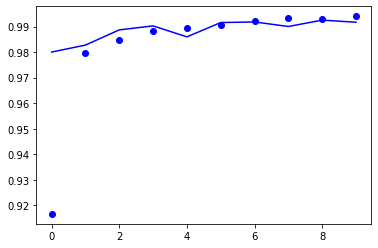

In [8]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, "bo", label="Training")
plt.plot(epochs, val_accuracy, "b", label="Validation")
print(model. evaluate(X_val, y_val))

In [9]:
predict = model.predict(X_test)

In [10]:
predict_label = []
for index in range(len(predict)):
    values = predict[index].tolist()
    predict_label.append(values.index(max(values)))

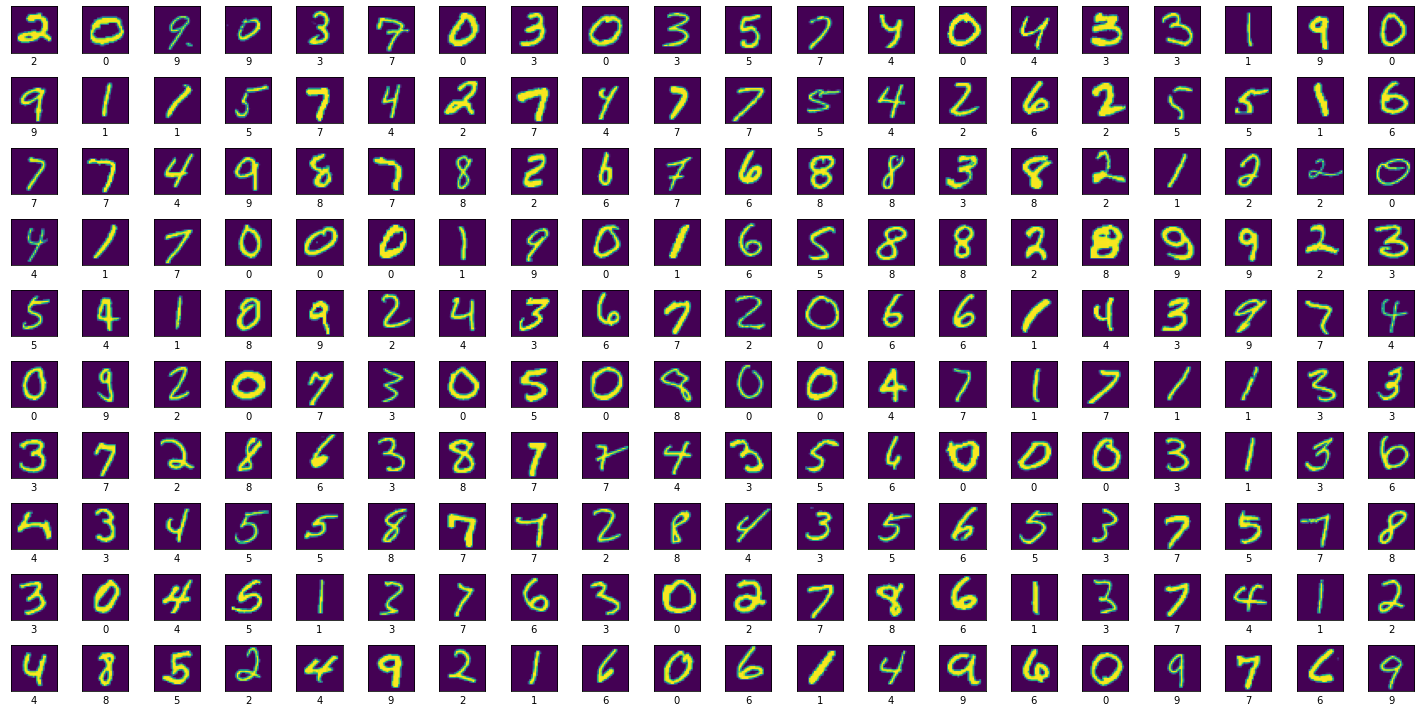

In [11]:
position = 1
plt.figure(figsize=(20,10))
for index in range(200):
    plt.subplot(10, 20, position)
    position += 1
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[index].reshape(28,28))
    plt.xlabel(predict_label[index])
plt.tight_layout()
plt.show()

In [12]:
predict_index = range(1,28001)

In [13]:
output = pd.DataFrame({'ImageId': predict_index, 'Label': predict_label})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [14]:
bad_values = []
for index in range(len(predict)):
    values = predict[index].tolist()
    if max(values) <= 0.8:
        bad_values.append(index)
len(bad_values)

215

In [15]:
bad_predict_label = []
for index in bad_values:
    values = predict[index].tolist()
    bad_predict_label.append(values.index(max(values)))

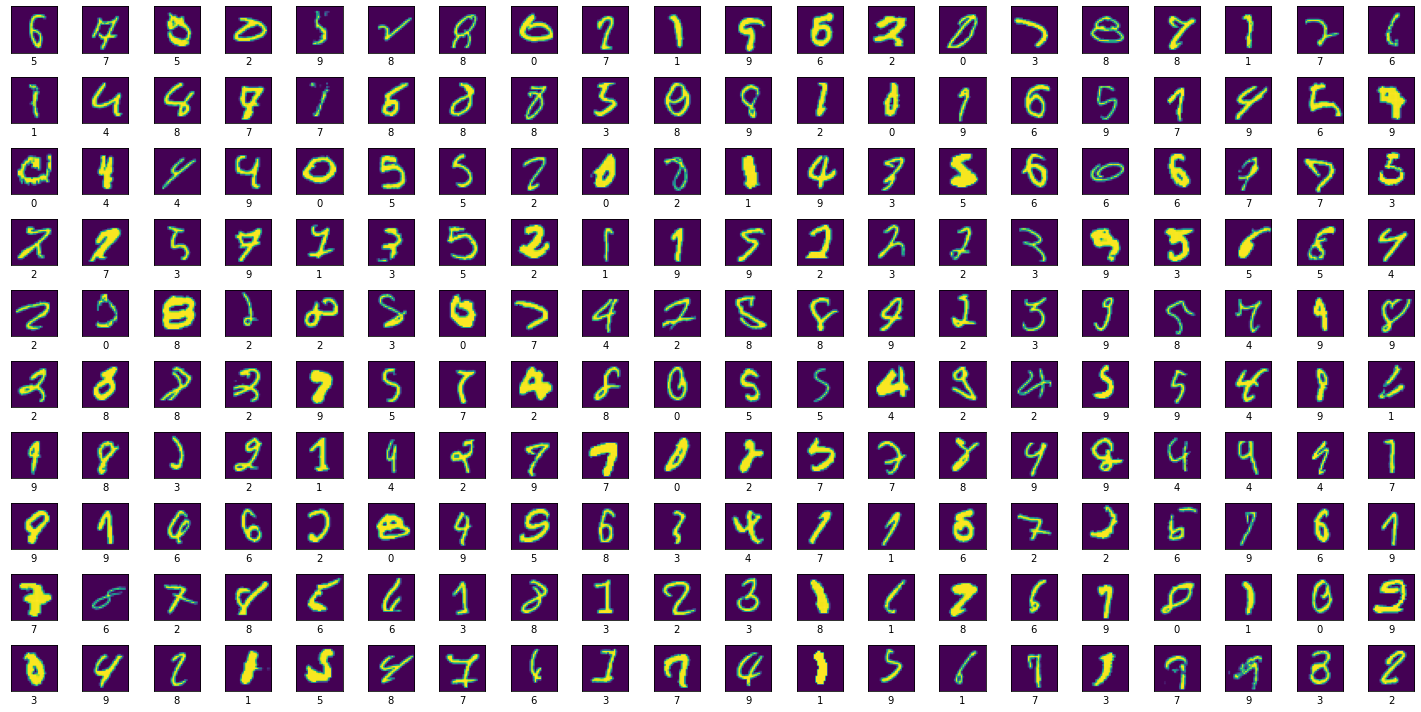

In [16]:
position = 1
plt.figure(figsize=(20,10))
for index in range(200):
    plt.subplot(10, 20, position)
    position += 1
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[bad_values[index]].reshape(28,28))
    plt.xlabel(bad_predict_label[index])
plt.tight_layout()
plt.show()